# <center><font color = '#DF9166' size = 20 center> **Data Exploration**</font></center>



## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Transaction Analysis**](#transaction_analysis)
4. [**Customer Behavior Analysis**](#behavior_analysis)
5. [**Fraud Risk Analysis**](#fraud_analysis)
6. [**Correlation Analysis**](#correlation_analysis)


## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [3]:
import os
import sys
import pandas as pd

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [6]:
sys.path.append(os.path.abspath(os.path.pardir))
from scripts.eda.transaction_analysis import TransactionAnalysis
from scripts.eda.behavior_analysis import CustomerBehaviorAnalysis
from scripts.eda.fraud_analysis import FraudRiskAnalysis
from scripts.eda.provider_analysis import PricingProviderAnalysis
from scripts.eda.correlation_analysis import CorrelationAnalysis

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [7]:
DATA_PATH = "../data/processed/cleaned_data.csv"

In [8]:
df = pd.read_csv(DATA_PATH, index_col=0)
df.head(2)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0


## <font color = '#DF9166' size=6>**Transaction Analysis**<font/><a class = 'anchor' id = 'transaction_analysis'/>

In [100]:
# Initialize the class
transaction_analyzer = TransactionAnalysis(df)

In [55]:
# Get total transactions and revenue
transaction_analyzer.total_transactions_revenue()

Total Transactions: 95662
Total Revenue: 237369145.67568624


The average revenue per transaction is approximately **$2,481.38**, indicating high-value transactions.

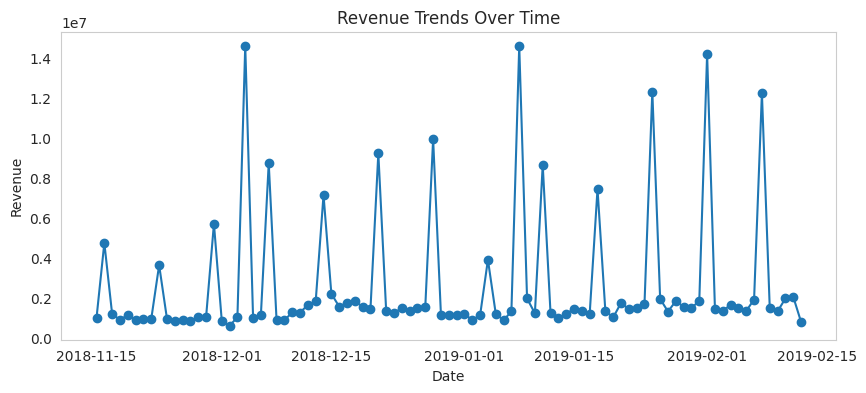

In [56]:
# Analyze revenue trends over time
transaction_analyzer.revenue_trends()

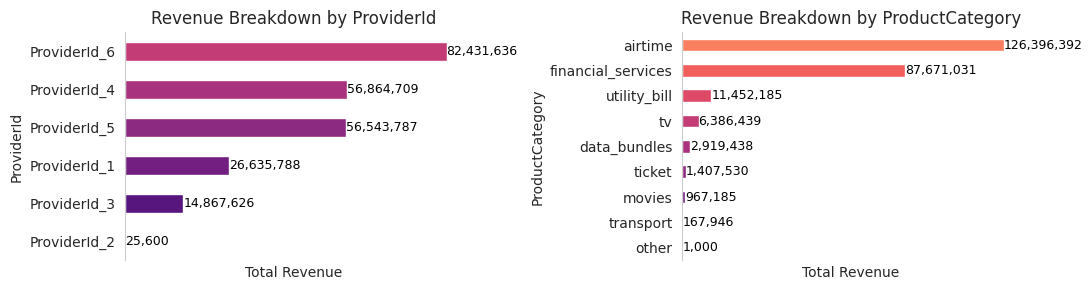

In [57]:
# Get revenue breakdown by provider, and category
transaction_analyzer.revenue_breakdown()

- **Top Provider:** ProviderId_6 dominates with ≈$82.4M revenue.  
- **Key Revenue Source:** Airtime leads at ≈$126.4M, followed by financial services (≈$87.7M).  
- **Low Revenue Areas:** Transport, movies, and "other" contribute minimally.  
- **Potential Focus:** Diversify revenue streams beyond top providers and mobile-related services.

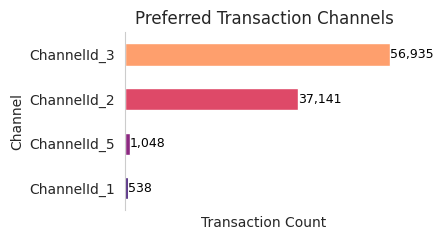

In [101]:
# Analyze preferred transaction channels
transaction_analyzer.preferred_transaction_channels()

- **ChannelId_3** is the most preferred, with **56,935** transactions.
- **ChannelId_2** follows at **37,141** transactions.
- **ChannelId_1** and **ChannelId_5** have minimal usage, with **538** and **1,048** transactions respectively.
- The data shows a strong preference for **ChannelId_3** and **ChannelId_2**, while the other channels are rarely used.

## <font color = '#DF9166' size=6>**Customer Behavior Analysis**<font/><a class = 'anchor' id = 'behavior_analysis'/>

In [109]:
# Initialize the analysis class
customer_analysis = CustomerBehaviorAnalysis(df)

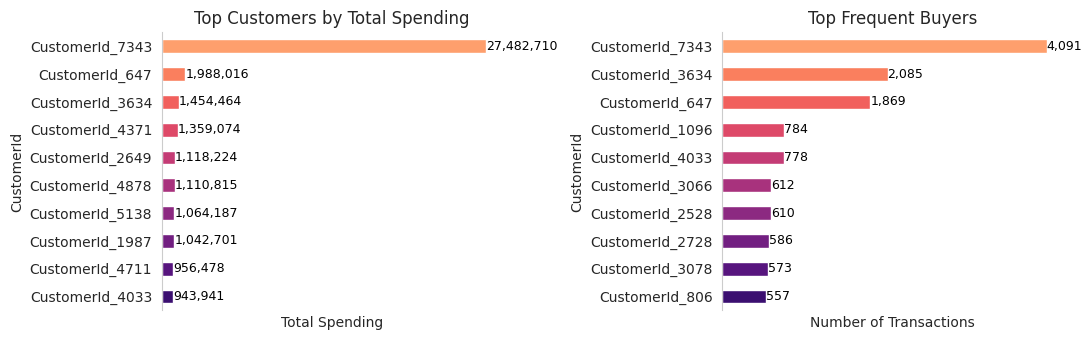

In [110]:
# Analyze frequent buyers
customer_analysis.top_customers_analysis()

- **Top spender**: **CustomerId_7343** leads both in **spending** ($27.48M) and **frequency** (4091 transactions), highlighting high engagement.
- **Frequent buyers**: **CustomerId_7343**, **3634**, and **647** dominate, with **7343** vastly outspending and outbuying others.

Repeat Customers: 3030
One-Time Customers: 712


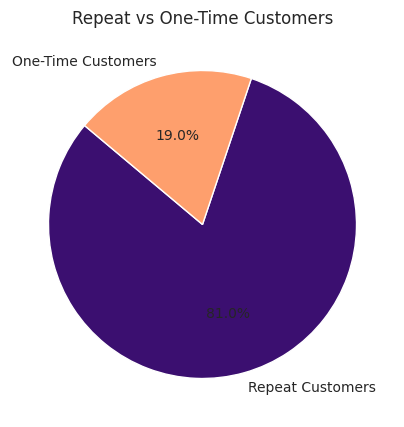

In [111]:
# Analyze repeat vs. one-time customers
customer_analysis.repeat_vs_one_time_customers()

- **81% Repeat Customers**: Strong retention.
- **19% One-Time Customers**: Potential for increased loyalty.

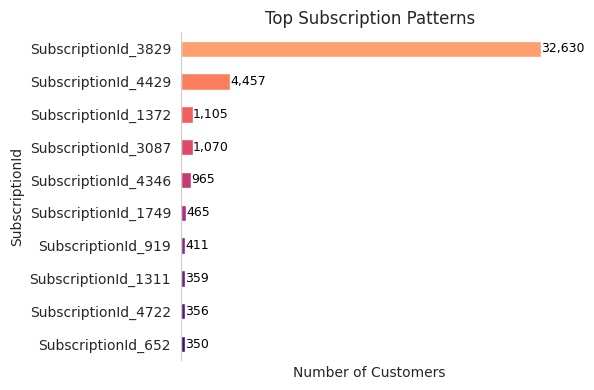

In [112]:
# Analyze customer subscription patterns
customer_analysis.subscription_patterns()

- **Dominant Subscription**: `SubscriptionId_3829` leads with 32,630 customers.
- **High Disparity**: Many subscriptions have significantly fewer customers (e.g., `SubscriptionId_652` with 350).
- **Opportunity**: Potential to grow or target less popular subscriptions.

## <font color = '#DF9166' size=6>**Pricing Provider Analysis**<font/><a class = 'anchor' id = 'provider_analysis'/>

In [150]:
# Initialize the analysis class
pricing_provider_analysis = PricingProviderAnalysis(df)

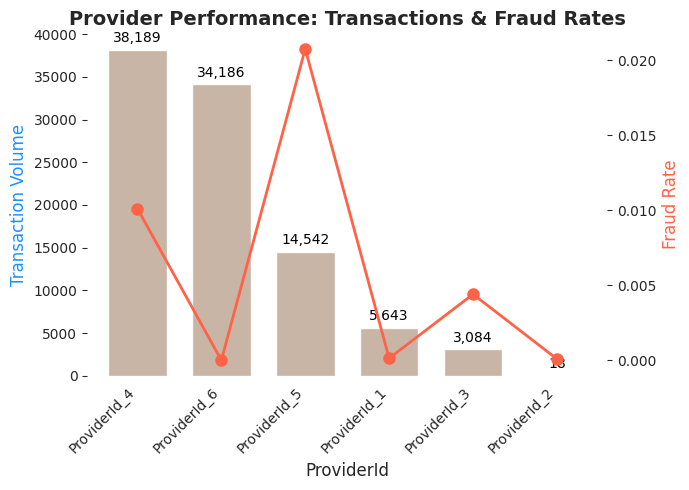

In [151]:
# Analyze provider-wise transaction volume and fraud rates
pricing_provider_analysis.provider_performance()

- **ProviderId_4** and **ProviderId_6** lead in transaction volume.
- **ProviderId_1** and **ProviderId_3** have higher fraud rates (1.01% and 2.08%).
- **ProviderId_2** has the lowest fraud rate (0%) but minimal transactions.
- **ProviderId_5** and **ProviderId_6** show low fraud rates despite decent volumes.

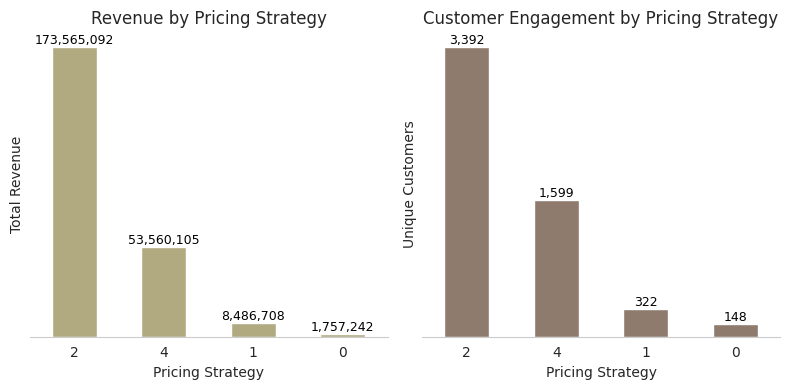

In [152]:
# Analyze pricing strategy effectiveness on customer engagement
pricing_provider_analysis.revenue_and_engagement_by_pricing_strategy()

- **Revenue**: Strategy 2 leads with over 173M, followed by Strategy 4 with 53M. Strategies 1 and 0 contribute less.
- **Customer Engagement**: Strategy 2 tops with 3,392 customers, while Strategy 4 has 1,599. Strategies 1 and 0 have minimal engagement.
- **Conclusion**: Strategy 2 is the most profitable and engaging.

## <font color = '#DF9166' size=6>**Fraud Risk Analysis**<font/><a class = 'anchor' id = 'fraud_analysis'/>

In [189]:
fraud_analysis = FraudRiskAnalysis(df)

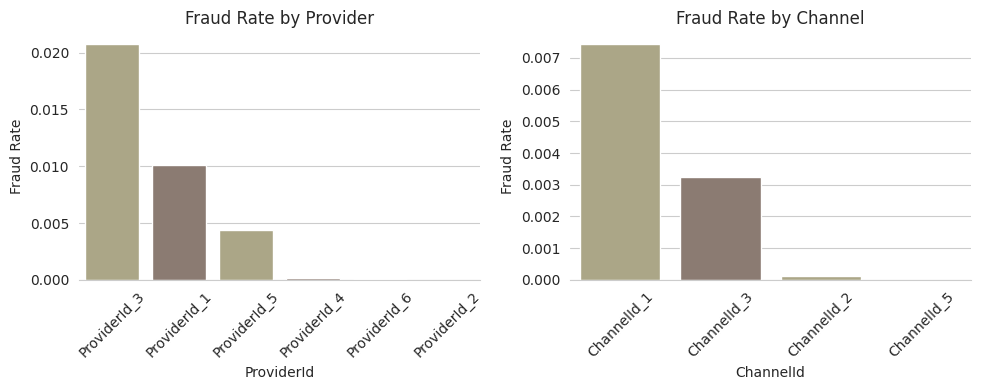

In [ ]:
fraud_analysis.plot_fraud_rates()

- **Fraud Rate by Provider:**
  - **ProviderId_3** (2.08%) shows the highest fraud risk, followed by **ProviderId_1** (1.01%).
  - **ProviderId_2** and **ProviderId_6** have minimal fraud (0.00% and 0.01%).

- **Fraud Rate by Channel:**
  - **ChannelId_1** has the highest fraud rate (0.74%), while **ChannelId_5** shows no fraud (0.00%).

**Key Takeaway:**
- **ProviderId_3** and **ChannelId_1** need closer scrutiny due to higher fraud rates, while **ProviderId_2**, **ProviderId_6**, and **ChannelId_5** are more reliable with minimal fraud.

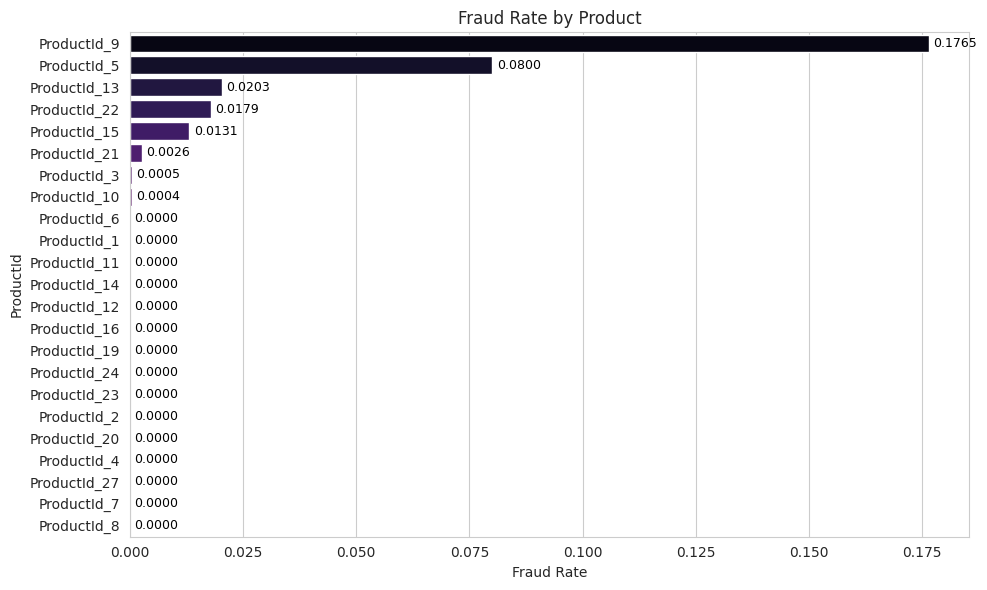

In [ ]:
fraud_analysis.plot_fraud_rate_by_product()

- **Highest Fraud Rate**: ProductId_9 has the highest fraud rate at 0.176471.
- **Low Fraud Rates**: Most products show a fraud rate close to 0, with many products having a fraud rate of 0%.
- **Mid-Range Fraud**: ProductId_5 has a significantly higher fraud rate of 0.080000 compared to others.
- **Anomalies**: A small number of products exhibit notable fraud rates, indicating potential areas for deeper investigation.

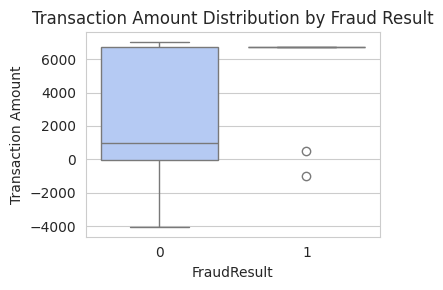

In [ ]:
fraud_analysis.plot_anomalies()

- Fraudulent transactions are consistently higher (~6645) with low variability.
- Non-fraudulent transactions show a wide range, indicating more diverse transaction amounts.

## <font color = '#DF9166' size=6>**Correlation Analysis**<font/><a class = 'anchor' id = 'correlation_analysis'/>


In [207]:
# Create an instance of CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(df)

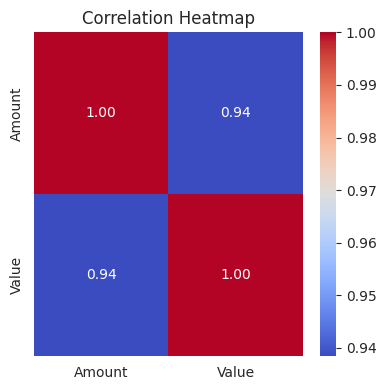

In [208]:
# Compute and plot the correlation matrix
correlation_analysis.plot_correlation_heatmap()

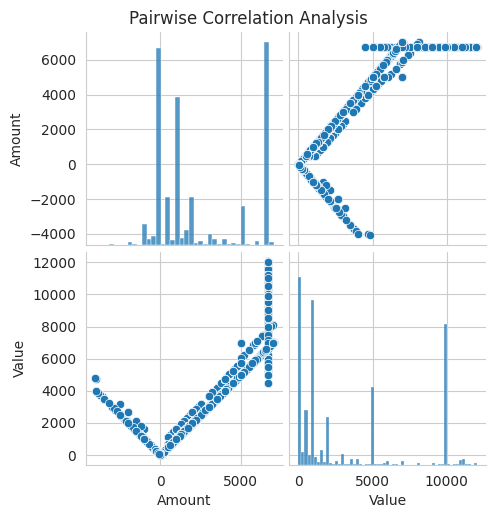

In [209]:
# Plot the pairwise correlation between Amount and Value
correlation_analysis.plot_pairwise_correlation()